# Projeto 1: Estratégia Anti-Crise - Análise Técnica usando médias móveis em ALPA4. (+160% contra -90% do ativo)

### Desafio:

* Testar historicamente um modelo que compra e venda ALPA4 baseado no cruzamento de médias móveis. 

### Passo a passo:

   **Passo 1** - Importar as bibliotecas.
   
   **Passo 2** - Pegar os dados do Yahoo Finance.
   
   **Passo 3** - Definir as janelas das médias móveis. 
   
   **Passo 4** - Calcular as médias móveis.
   
   **Passo 5** - Calcular o retorno diário da ação.
   
   **Passo 6** - Criar os sinais de compra ou venda. 
   
   **Passo 7** - Calcular o retorno do modelo.
   
   **Passo 8** - Calcular o retorno da ação e do Ibovespa no mesmo período.

   **Passo 9** - Criar o gráfico de retornos para observar o resultado da estratégia.

   **Passo 10** - Otimizar os parâmetros pra gerar melhores resultados.

   ***
   
-------------------

# Passo 1 - Importar as bibliotecas

In [3]:
!pip install yfinance
!pip install mplcyberpunk

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import mplcyberpunk
plt.style.use("cyberpunk")

# Passo 2 - Pegar os dados do Yahoo Finance

In [8]:
ticker = "ALPA4.SA"
data = yf.download(ticker, start="2021-05-27", end="2024-09-10")

[*********************100%***********************]  1 of 1 completed


# Passo 3 - Definir as janelas das médias móveis

In [11]:
janela_rapida = 7
janela_lenta = 40

# Passo 4 - Calcular as médias móveis

In [14]:
# Calculando as médias móveis
data['Média Rápida'] = data['Adj Close'].rolling(window=janela_rapida).mean()
data['Média Lenta'] = data['Adj Close'].rolling(window=janela_lenta).mean()

# Passo 5 - Calcular o retorno diário da ação

In [17]:
data["retorno_diario"] = data["Adj Close"].pct_change()
data = data.dropna()

# Passo 6 - Criar os sinais de compra ou venda

In [20]:
# Criando a coluna 'Sinal' para marcar os pontos de compra (1) e venda (-1)
data['comprado_ou_vendido'] = 0
data['comprado_ou_vendido'] = np.where(data['Média Rápida'] > data['Média Lenta'], 1, -1)
data['comprado_ou_vendido'] = data['comprado_ou_vendido'].shift(1)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4652\2328610668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comprado_ou_vendido'] = 0
C:\Users\Administrador\AppData\Local\Temp\ipykernel_4652\2328610668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comprado_ou_vendido'] = np.where(data['Média Rápida'] > data['Média Lenta'], 1, -1)
C:\Users\Administrador\AppData\Local\Temp\ipykernel_4652\2328610668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

# Passo 7 - Calcular o retorno do modelo

In [23]:
data["retorno_modelo"] = data["retorno_diario"] * data["comprado_ou_vendido"]

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4652\4133874948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["retorno_modelo"] = data["retorno_diario"] * data["comprado_ou_vendido"]


In [25]:
data['retorno_acum_modelo'] = (1 + data['retorno_modelo']).cumprod() - 1

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4652\838143380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['retorno_acum_modelo'] = (1 + data['retorno_modelo']).cumprod() - 1


# Passo 8 - Calcular o retorno da ação e do Ibovespa no mesmo período

In [28]:
data['retorno_acum_acao'] = (1 + data['retorno_diario']).cumprod() - 1

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4652\3282814529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['retorno_acum_acao'] = (1 + data['retorno_diario']).cumprod() - 1


In [30]:
ibov = yf.download("^BVSP", start = data.index[0], end = "2024-09-10")["Close"]

data["retorno_ibov"] = ibov.pct_change().values
data["retorno_ibov"] = (1 + data["retorno_ibov"]).cumprod() - 1 

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Média Rápida,Média Lenta,retorno_diario,comprado_ou_vendido,retorno_modelo,retorno_acum_modelo,retorno_acum_acao,retorno_ibov
Date,,,,,,,,,,,,,,
2021-07-23,52.749275,53.009075,52.039825,52.449509,51.871437,1268778,51.740145,49.516520,-0.003607,NaN,NaN,NaN,-0.003607,NaN
2021-07-26,52.969109,52.969109,51.670109,51.859962,51.288391,1088239,51.694970,49.662776,-0.011240,1.0,-0.011240,-0.011240,-0.014806,0.007605
2021-07-27,51.700089,51.829987,50.590942,51.680103,51.110512,2018557,51.630030,49.778644,-0.003468,1.0,-0.003468,-0.014669,-0.018223,-0.003527
2021-07-28,51.620148,52.149738,50.980640,51.530216,50.962276,2620821,51.505797,49.884383,-0.002900,1.0,-0.002900,-0.017527,-0.021071,0.009860
2021-07-29,51.410313,51.959885,50.880718,51.200474,50.636166,1792482,51.305330,49.961711,-0.006399,1.0,-0.006399,-0.023814,-0.027335,0.004974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03,7.630000,7.840000,7.560000,7.600000,7.600000,6196200,7.930000,8.475750,-0.003932,-1.0,0.003932,1.170455,-0.854012,0.074368
2024-09-04,7.650000,7.760000,7.600000,7.670000,7.670000,23248900,7.857143,8.431750,0.009211,-1.0,-0.009211,1.150463,-0.852668,0.088427
2024-09-05,7.670000,7.720000,7.370000,7.590000,7.590000,9944000,7.761428,8.389250,-0.010430,-1.0,0.010430,1.172893,-0.854204,0.091553


# Passo 9 - Criar o gráfico de retornos para observar o resultado da estratégia.

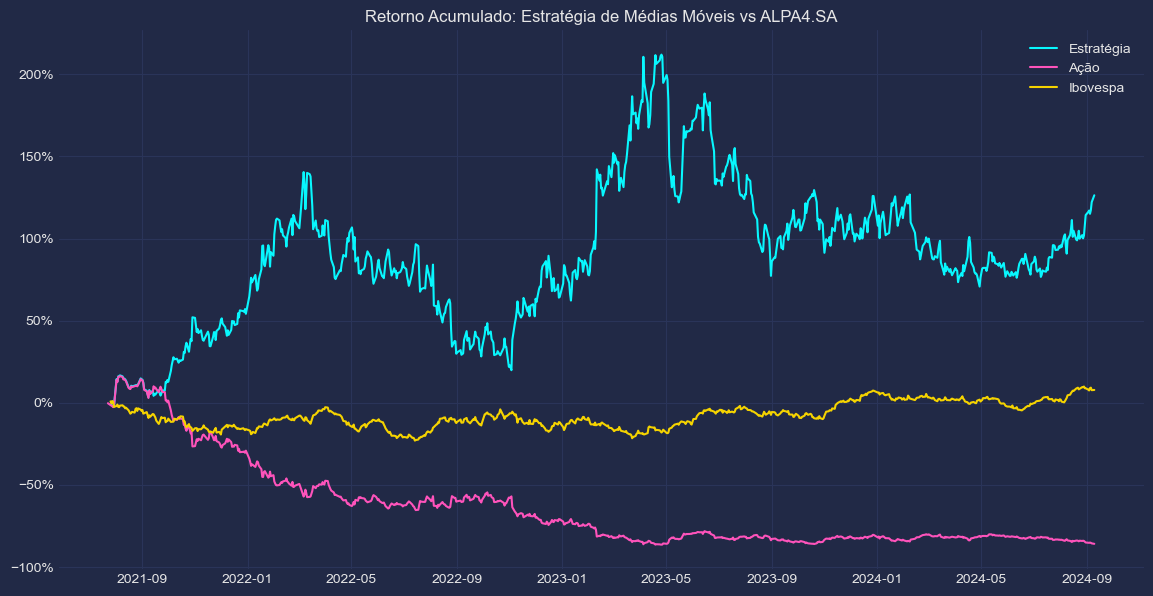

In [33]:
# Plotando o resultado
plt.figure(figsize=(14, 7))
plt.plot(data['retorno_acum_modelo'], label='Estratégia')
plt.plot(data['retorno_acum_acao'], label='Ação')
plt.plot(data['retorno_ibov'], label='Ibovespa')
plt.title(f'Retorno Acumulado: Estratégia de Médias Móveis vs {ticker}')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(loc='best')
plt.show()

# Passo 10: Otimizar os resultados